In [1]:
# Import everything
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (16,7)
mpl.rcParams["image.interpolation"] = "nearest"
mpl.rcParams["image.origin"] = "lower"

import pysynphot as S
from astropy.table import Table
from astropy.io import fits

/Users/keith/miniconda3/envs/grizli-env/lib/python3.12/site-packages/pysynphot/refs.py:117: UserWarning: No graph or component tables found; functionality will be SEVERELY crippled. No files found for /Users/keith/PYSYN_CDBS/mtab/*_tmg.fits
  warnings.warn('No graph or component tables found; '
/Users/keith/miniconda3/envs/grizli-env/lib/python3.12/site-packages/pysynphot/refs.py:124: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /Users/keith/PYSYN_CDBS/mtab/*_tmt.fits
  warnings.warn('No thermal tables found, '


In [2]:
# Load all needed files
hlss_tbl = Table.read("/Users/keith/astr/research_astr/FOV0/catalogs/MOT_SCA1_roll_0_dither_0x_0y_cut_zcut.txt",
                      format='ascii')
hlss_tbl = hlss_tbl.group_by("MODIMAGE")
hlss_tbl.groups[0].sort("MAG_F1500W", reverse=True)
hlss_tbl.groups[1].sort("MAG_F1500W", reverse=True)

file = fits.open("/Users/keith/astr/research_astr/summer-roman-project/4) FOV0_sims/fits/GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final.fits")
direct_img = file[1].data
file.close()

file = fits.open("/Users/keith/astr/research_astr/summer-roman-project/4) FOV0_sims/fits/GRS_FOV0_roll0_dx0_dy0_SCA1_slitless_final.fits")
slitless_img = file[1].data - 0.63
file.close()

file = fits.open("/Users/keith/astr/research_astr/summer-roman-project/4) FOV0_sims/fits/integrated_sim.fits")
grizli_img = file[1].data
file.close()

df = Table.read("/Users/keith/astr/research_astr/FOV0/FOV0_SEDs/wfirst_wfi_f158_001_syn.fits", format='fits')
bp = S.ArrayBandpass(df["WAVELENGTH"], df["THROUGHPUT"])

sens = Table.read("/Users/keith/astr/research_astr/summer-roman-project/toy_configs/sens_0720_2020.fits", format="fits")

In [3]:
# Find object in table using direct image coords; track object info
direct_x = 1383
direct_y = 850
size = 5

condition = (abs(hlss_tbl["X_IMAGE"] - direct_x) <= size) & (abs(hlss_tbl["Y_IMAGE"] - direct_y) <= size)
object = hlss_tbl[np.where(condition)][0]

mag = object["MAG_F1500W"]
if object["MODIMAGE"]:
    print("TODO")
else:
    sed = "SED:rest:gal.{0}.fits".format(object["SPECTEMP"])

(800.0, 900.0)

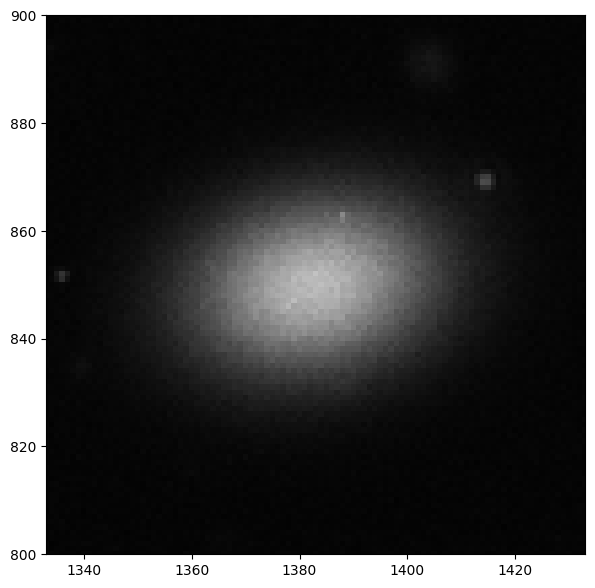

In [4]:
# Show object on direct image
plt.imshow(direct_img, cmap="grey", vmin=0, vmax=direct_img.max()/1000)
plt.xlim(max(direct_x - 50, 0), min(direct_x + 50, 4088))
plt.ylim(max(direct_y - 50, 0), min(direct_y + 50, 4088))

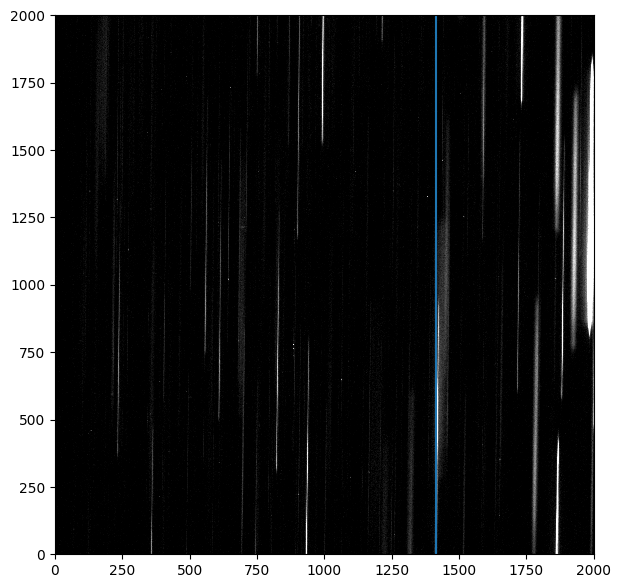

In [5]:
plt.imshow(slitless_img, cmap="grey", vmin=0, vmax=2)

plt.ylim(0, 2000)
plt.xlim(0,2000)

plt.axvline(1413)

In [6]:
# Gather fluxes from grism images
grizli_bounds = {"x": (1412,1415),
                   "y": (320,1246)}

slitless_bounds = {"x": (1438,1440),
                   "y": (320,1246)}

grizli_cutout = grizli_img[grizli_bounds['y'][0]:grizli_bounds['y'][1], grizli_bounds['x'][0]:grizli_bounds['x'][1]]

slitless_cutout = slitless_img[slitless_bounds['y'][0]:slitless_bounds['y'][1], slitless_bounds['x'][0]:slitless_bounds['x'][1]]

grizli_flux = []
for ii in range(grizli_cutout.shape[0]):
    grizli_flux.append(grizli_cutout[ii,:].max())

slitless_flux = []
for ii in range(grizli_cutout.shape[0]):
    slitless_flux.append(slitless_cutout[ii,:].max())

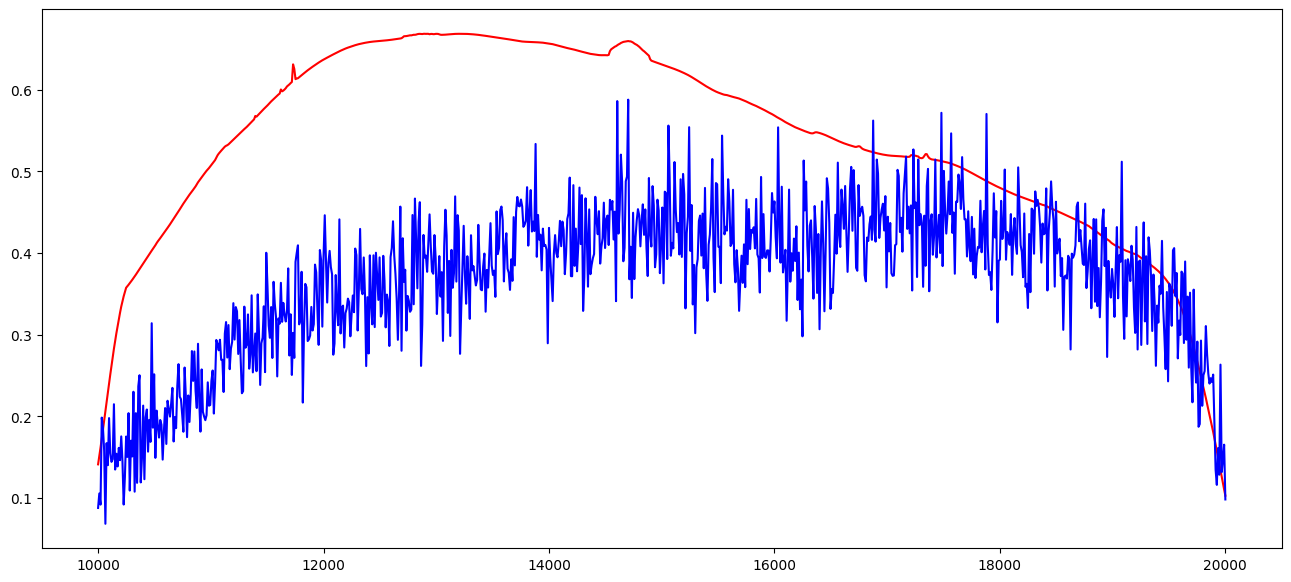

In [7]:
grizli_min_lambda = 10000
grizli_max_lambda = 20000
grizli_wave = np.linspace(grizli_min_lambda, grizli_max_lambda, len(grizli_flux))

slitless_min_lambda = 10000
slitless_max_lambda = 20000
slitless_wave = np.linspace(slitless_min_lambda, slitless_max_lambda, len(slitless_flux))

plt.plot(grizli_wave, grizli_flux, c='r', label="Grizli Counts on detector")
plt.plot(slitless_wave, slitless_flux, c='b', label="HLSS Grism Counts on detector")